In [3]:
# Stage 2: Data Understanding
# 2.1 Collecting Initial Data
# 2.1.1 Initial Data Collection Report

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Added cross_val_score import
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import joblib
import numpy as np


from google.colab import drive
drive.mount('/content/drive')

# Load the dataset of offline
# data = pd.read_csv('bike_sharing_dataset/day.csv')

# Load dataset - adjust the path based on the location in your Drive
file_path = '/content/drive/My Drive/Colab Notebooks/MLN-Ass.3/bike_sharing_dataset/day.csv'  # Replace with the actual path
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Initial Data Collection Report
initial_data_report = {
    "Shape": data.shape,
    "Columns": data.columns.tolist(),
    "Missing Values": data.isnull().sum().sum(),
    "Sample Data": data.head()
}



In [5]:
initial_data_report

{'Shape': (731, 16),
 'Columns': ['instant',
  'dteday',
  'season',
  'yr',
  'mnth',
  'holiday',
  'weekday',
  'workingday',
  'weathersit',
  'temp',
  'atemp',
  'hum',
  'windspeed',
  'casual',
  'registered',
  'cnt'],
 'Missing Values': 0,
 'Sample Data':    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273  

In [6]:
# 2.2 Data Description
# 2.2.1 Data Description Report

# Now, let's describe the dataset in terms of its features and data types.

# Data Description Report
data_description_report = data.describe(include='all')
data_description_report

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [7]:
# 2.3 Verifying Data Quality
# 2.3.1 Data Quality Report

# Here, I assess the quality of the data by checking for missing, infinite values, and outliers.

# Checking for Missing Values
# Data Quality Report
missing_values_report = data.isnull().sum()

# Checking for Infinite Values
infinite_values_report = data.isin([float('inf'), float('-inf')]).sum()
duplicates_report = data.duplicated().sum()

data_quality_report = {
    "Missing Values": missing_values_report,
    "Infinite Values": infinite_values_report,
    "Duplicates": duplicates_report
}

data_quality_report

{'Missing Values': instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 'Infinite Values': instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 'Duplicates': 0}

In [8]:
duplicates_report

0

In [9]:
# 2.3.2 Checking & Removing Outliers
def remove_outliers(df, columns):
    for col in columns:
        df = df[(np.abs(df[col] - df[col].mean()) <= (3 * df[col].std()))]
    return df

columns_to_check = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
data_cleaned = remove_outliers(data, columns_to_check)

outliers_removed_report = {
    "Original Shape": data.shape,
    "Cleaned Shape": data_cleaned.shape
}

outliers_removed_report


{'Original Shape': (731, 16), 'Cleaned Shape': (726, 16)}

In [10]:
# 2.3.4 Checking & Handling Infinite Values

# Similarly, handle infinite values.

# Replace infinite values with NaN
data_cleaned.replace([float('inf'), float('-inf')], np.nan, inplace=True)

# Select only numeric columns for filling with mean
numeric_columns = data_cleaned.select_dtypes(include=np.number).columns
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].fillna(data_cleaned[numeric_columns].mean())

# Confirm infinite values are handled
infinite_check_report = data_cleaned.isin([float('inf'), float('-inf')]).sum().sum()
infinite_check_report

0

In [11]:

# Handle NaN values (if any)
data_cleaned.fillna(method='ffill', inplace=True)

<ipython-input-11-322d863cdad5>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_cleaned.fillna(method='ffill', inplace=True)


In [12]:
#2.3.5 Randomize the Datasets

#To avoid any order-based bias, we randomize the dataset.

# Randomizing the dataset
data_cleaned = data_cleaned.sample(frac=1).reset_index(drop=True)
data_cleaned.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,592,2012-08-14,3,1,8,0,2,1,1,0.726667,0.676779,0.686667,0.169158,1128,5656,6784
1,258,2011-09-15,3,0,9,0,4,1,2,0.577500,0.553671,0.709167,0.271146,428,3231,3659
2,161,2011-06-10,2,0,6,0,5,1,1,0.755000,0.703292,0.605000,0.140554,815,3771,4586
3,265,2011-09-22,3,0,9,0,4,1,2,0.628333,0.554963,0.902083,0.128125,555,4240,4795
4,53,2011-02-22,1,0,2,0,2,1,1,0.182222,0.186033,0.577778,0.195683,74,1376,1450


<Figure size 2000x1000 with 0 Axes>

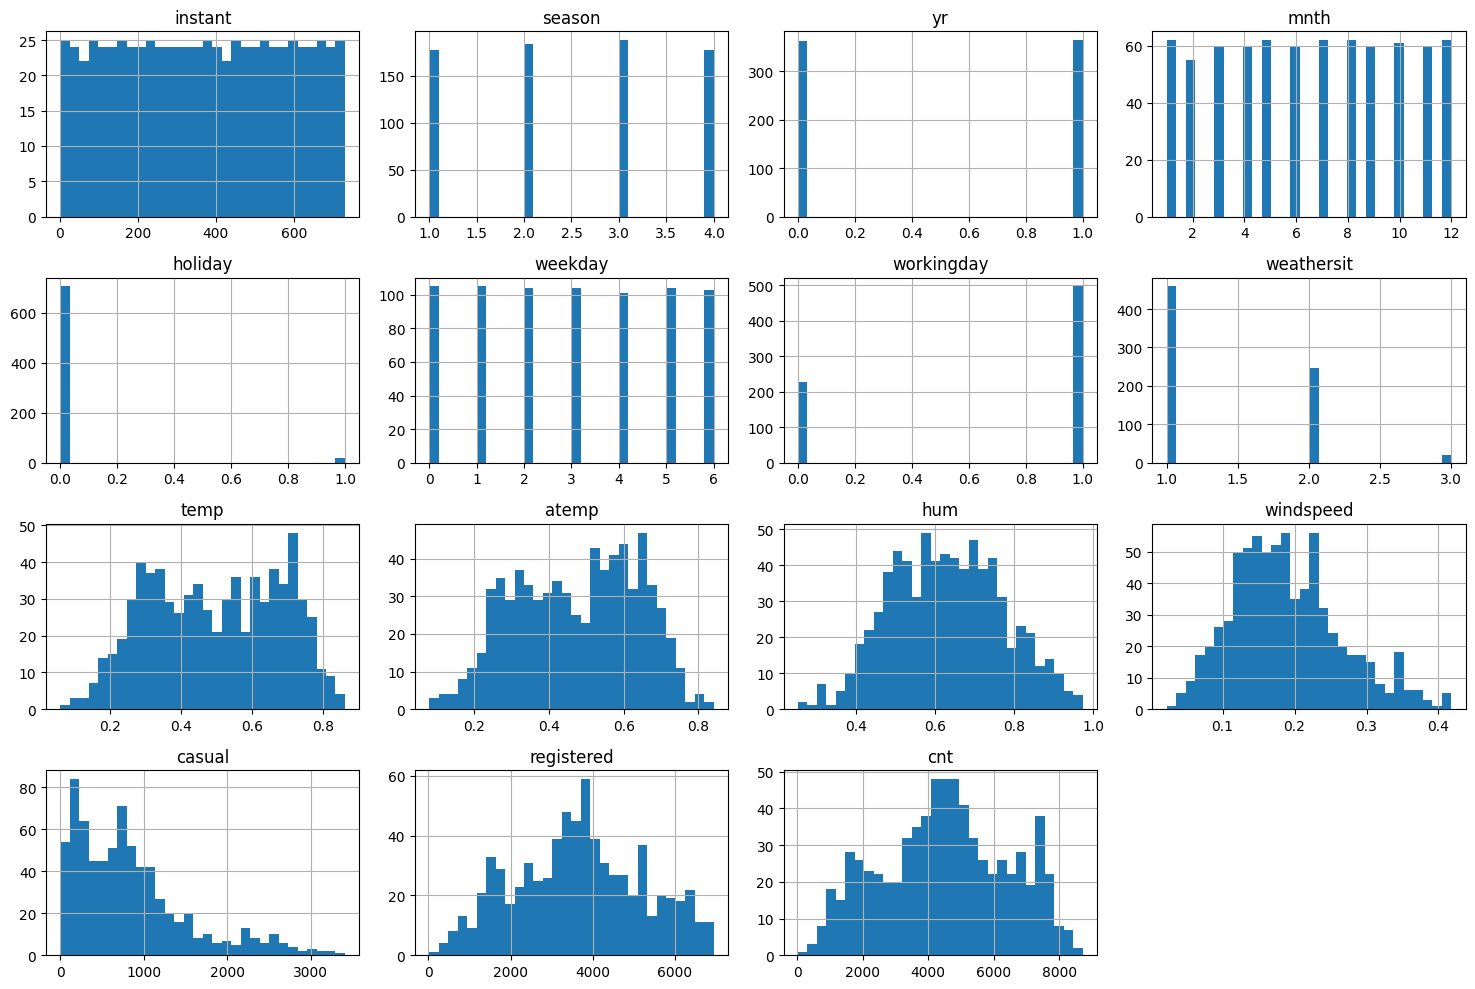

In [13]:

# 2.4 Data Exploration
# 2.4.1 Data Exploration Report

# I explore the data by looking at distributions and correlations.

# 2.4.1.1 Distributions

import matplotlib.pyplot as plt

# Plot distributions for all features
plt.figure(figsize=(20, 10))
data_cleaned.hist(bins=30, figsize=(15, 10))
plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()


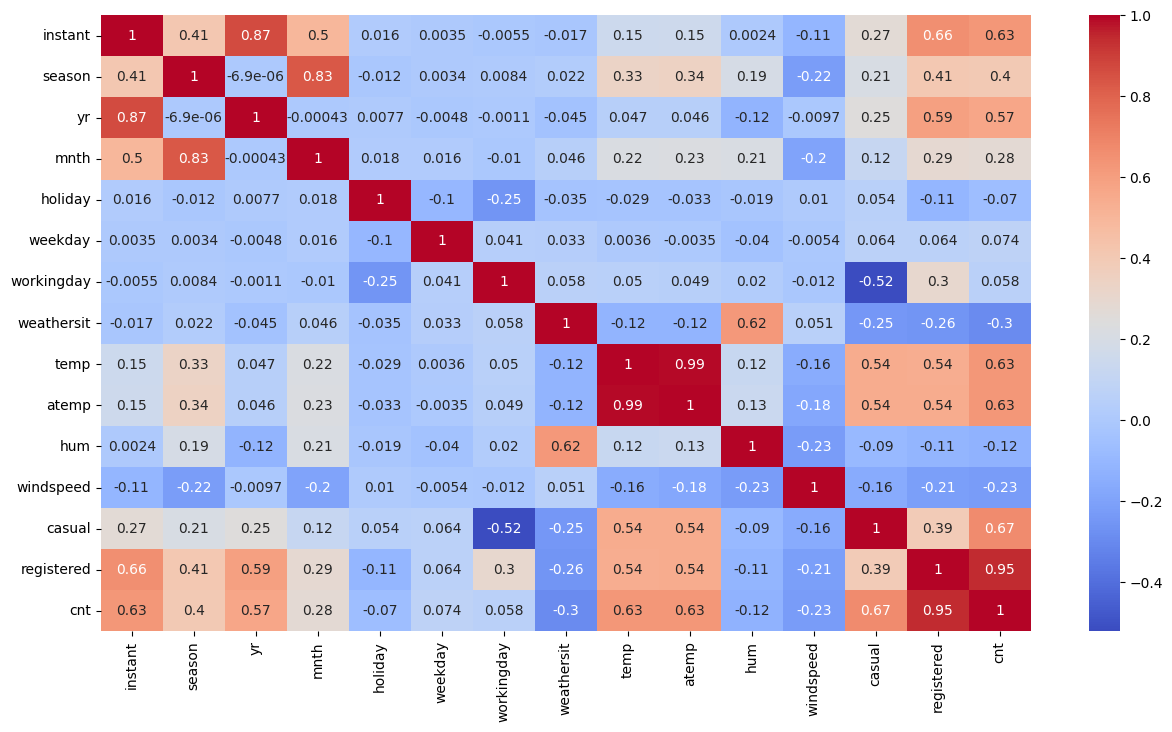

In [14]:
# 2.4.1.2 Correlations
import seaborn as sns

# Select only numeric columns
numeric_data = data_cleaned.select_dtypes(include=np.number)

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [15]:
# Stage 3: Data Preparation
# 3.1 Selecting Features
features = data_cleaned[['temp', 'hum', 'windspeed', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']]
target = data_cleaned['cnt']

In [16]:
# 3.2 Cleaning Data
# 3.2.1 Data Cleaning Report

# The data has already been cleaned in earlier steps, so we provide a summary here.

# Data Cleaning Report
data_cleaning_report = {
    "Final Shape": data_cleaned.shape,
    "Missing Values": data_cleaned.isnull().sum().sum(),
    "Infinite Values": data_cleaned.isin([float('inf'), float('-inf')]).sum().sum()
}

data_cleaning_report


{'Final Shape': (726, 16), 'Missing Values': 0, 'Infinite Values': 0}

In [17]:
# 3.3 Construct Data
# 3.3.1 Derived Features/Inputs

# No derived features for this analysis as per the requirements.

# 3.3.2 Generated Targets/Outputs

# Already determined.

# 3.4 Integrating Data
# 3.4.1 Merged Data

# Data does not need merging; it's already in a single DataFrame.

# 3.5 Formatting Data
#v 3.5.1 Reformatted Data

# Ensure data types are correct.

# Ensuring correct data types

In [18]:
# Stage 4: Model Building
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
# 4.1 Building the Model using LinearRegression
model = LinearRegression()

In [19]:
# 4.2 Hyperparameter Tuning using Cross-Validation
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
mean_cv_score = cross_val_scores.mean()

# Train the model on the entire training set
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Model Evaluation on Test Set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [21]:
# Model Evaluation Report
evaluation_report = {
    "Mean Cross-Validation R^2 Score": mean_cv_score,
    "Mean Absolute Error": mae,
    "R^2 Score": r2,
    "Mean Absolute Percentage Error": mape
}

evaluation_report

{'Mean Cross-Validation R^2 Score': 0.7873128432776475,
 'Mean Absolute Error': 678.910009868761,
 'R^2 Score': 0.7746499707452079,
 'Mean Absolute Percentage Error': 1.4709418236021417}

In [22]:
# Stage 5: Evaluation
# 5.1 Evaluating Results
# Creating a Holdout Dataset
X_train_final, X_holdout, y_train_final, y_holdout = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [23]:
# Re-train the model on the final training set (excluding holdout)
model_final = LinearRegression()
model_final.fit(X_train_final, y_train_final)



LinearRegression()

In [24]:
# Evaluation on Holdout Dataset
y_holdout_pred = model_final.predict(X_holdout)
mae_holdout = mean_absolute_error(y_holdout, y_holdout_pred)
r2_holdout = r2_score(y_holdout, y_holdout_pred)
mape_holdout = mean_absolute_percentage_error(y_holdout, y_holdout_pred)

unseen_dataset_evaluation = {
    "Mean Absolute Error (Holdout)": mae_holdout,
    "R^2 Score (Holdout)": r2_holdout,
    "Mean Absolute Percentage Error (Holdout)": mape_holdout
}



In [25]:
unseen_dataset_evaluation

{'Mean Absolute Error (Holdout)': 621.291054306597,
 'R^2 Score (Holdout)': 0.7744901304491445,
 'Mean Absolute Percentage Error (Holdout)': 0.1603081484502299}

In [26]:
# 5.2.2 Export Model for Use
model_filename = '/content/drive/My Drive/Colab Notebooks/MLN-Ass.3/app/models/linear_regression_model_bike_demand.pkl'
joblib.dump(model_final, model_filename)



['/content/drive/My Drive/Colab Notebooks/MLN-Ass.3/app/models/linear_regression_model_bike_demand.pkl']

In [27]:
# 5.2.3 Test the Exported Model
loaded_model = joblib.load(model_filename)
test_prediction = loaded_model.predict(X_test)


In [28]:
test_prediction

array([4818.92509651, 2574.21228576, 4293.502132  , 4650.55266201,
       4417.72016103, 6462.77576429, 6233.30010537, 3932.56021742,
       2512.79458005, 3083.50781563, 1366.96032326, 6757.95471784,
       4849.6910994 , 1516.55618483, 5311.688358  , 4402.45179018,
       3001.23944275, 3705.7485298 , 5474.05475763, 2934.49719799,
       5181.6227847 , 2910.29848609, 5727.97850379, 3085.95276919,
       4395.37688834, 4123.62662002, 2358.72320654, 5575.70897914,
       2794.22793685, 3281.11738489, 7006.92972501, 3595.64666297,
       3058.44174709, 1210.9230082 , 4955.41976208, 3496.64967417,
       5202.18348684, 1450.16466595, 5927.66789181, 5184.11044137,
       4198.26025736, 3244.96396218, 4988.13185221, 1486.68480389,
       1456.21337132, 4552.99606142, 6810.03801257, 3639.85609053,
       1935.3718568 , 5341.05398957, 3917.50339091, 5903.52661946,
       5163.26475913, 4886.71568906, 6048.23205566, 6664.9556226 ,
       4693.2999009 , 5545.7667128 , 3858.75953325, 5781.57576